In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
X = df.drop(['Churn' , 'customerID'] , axis = 1)
X = pd.get_dummies(X , drop_first=True)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
total = (df['Churn']=='Yes').sum()+(df['Churn']=='No').sum()
No_Percent=((df['Churn']=='No').sum()/total)*100
Yes_Percent=((df['Churn']=='Yes').sum()/total)*100
print("Churn Percent : NO is = {} and Yes is = {}".format(No_Percent,Yes_Percent))

Churn Percent : NO is = 73.42150170648463 and Yes is = 26.578498293515356


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
7031    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

There are 7032 rows of data. There are non null values in given dataset.Churn Percent : NO is = 73.42 and Yes is = 26.58

<AxesSubplot:xlabel='Churn', ylabel='count'>

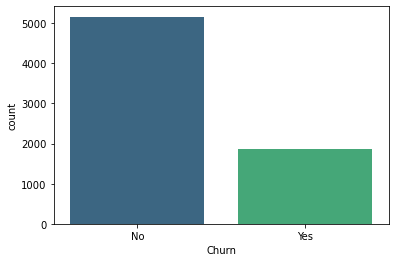

In [8]:
sns.countplot(data=df , x = 'Churn' , palette='viridis')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

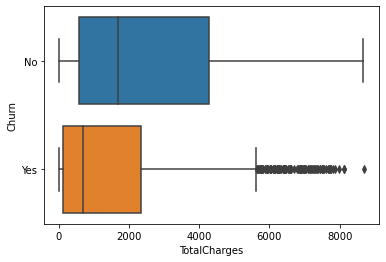

In [9]:
sns.boxplot(data=df, x='TotalCharges', y='Churn')

lots of customer between 6000-8000 rs leave the product.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

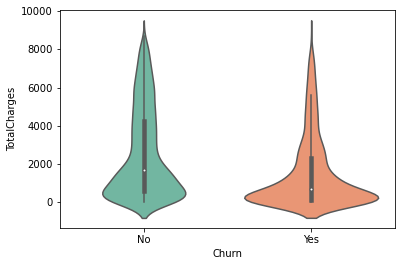

In [10]:
sns.violinplot(data=df, y='TotalCharges', x='Churn', palette='Set2')

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

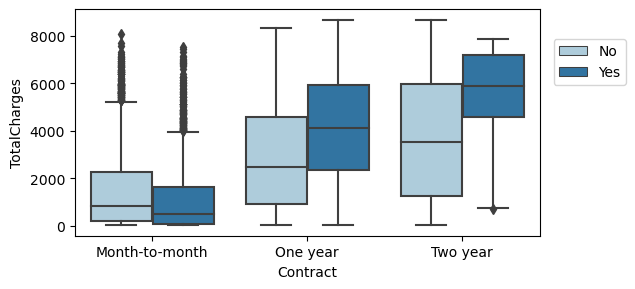

In [12]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(data=df, y='TotalCharges' , x= 'Contract' , hue= 'Churn' , palette='Paired')
plt.legend(bbox_to_anchor=(1.2,0.9))

In [13]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']]).corr()

In [14]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

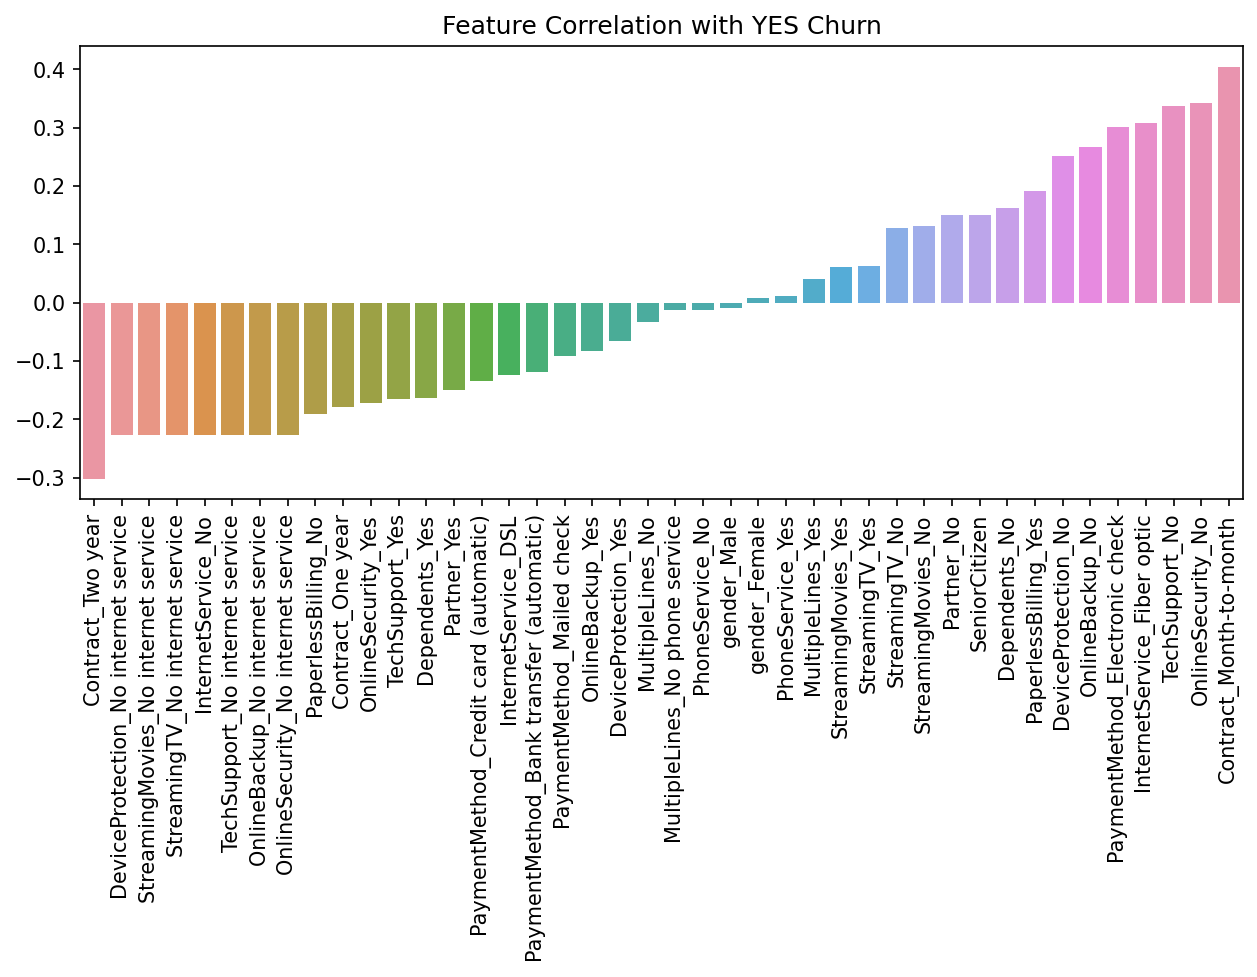

In [15]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=corr_yes_churn.index , y = corr_yes_churn.values)
plt.title('Feature Correlation with YES Churn')
plt.xticks(rotation=90);

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

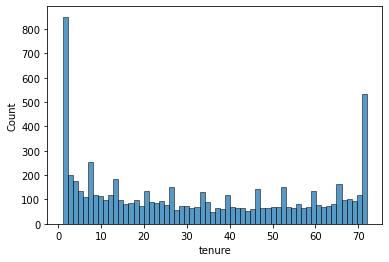

In [17]:
sns.histplot(data = df , x = 'tenure',bins= 60)

large amount of customer has tenure between 1 month

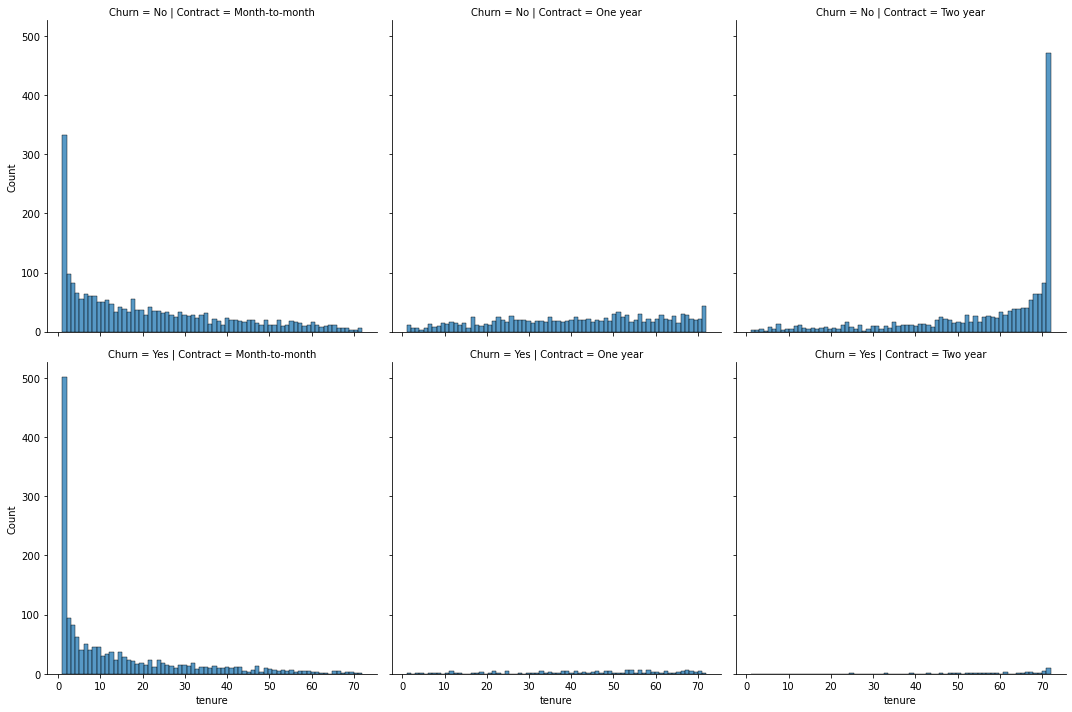

In [18]:
sns.displot(data =df , x='tenure', bins=70,col='Contract',row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

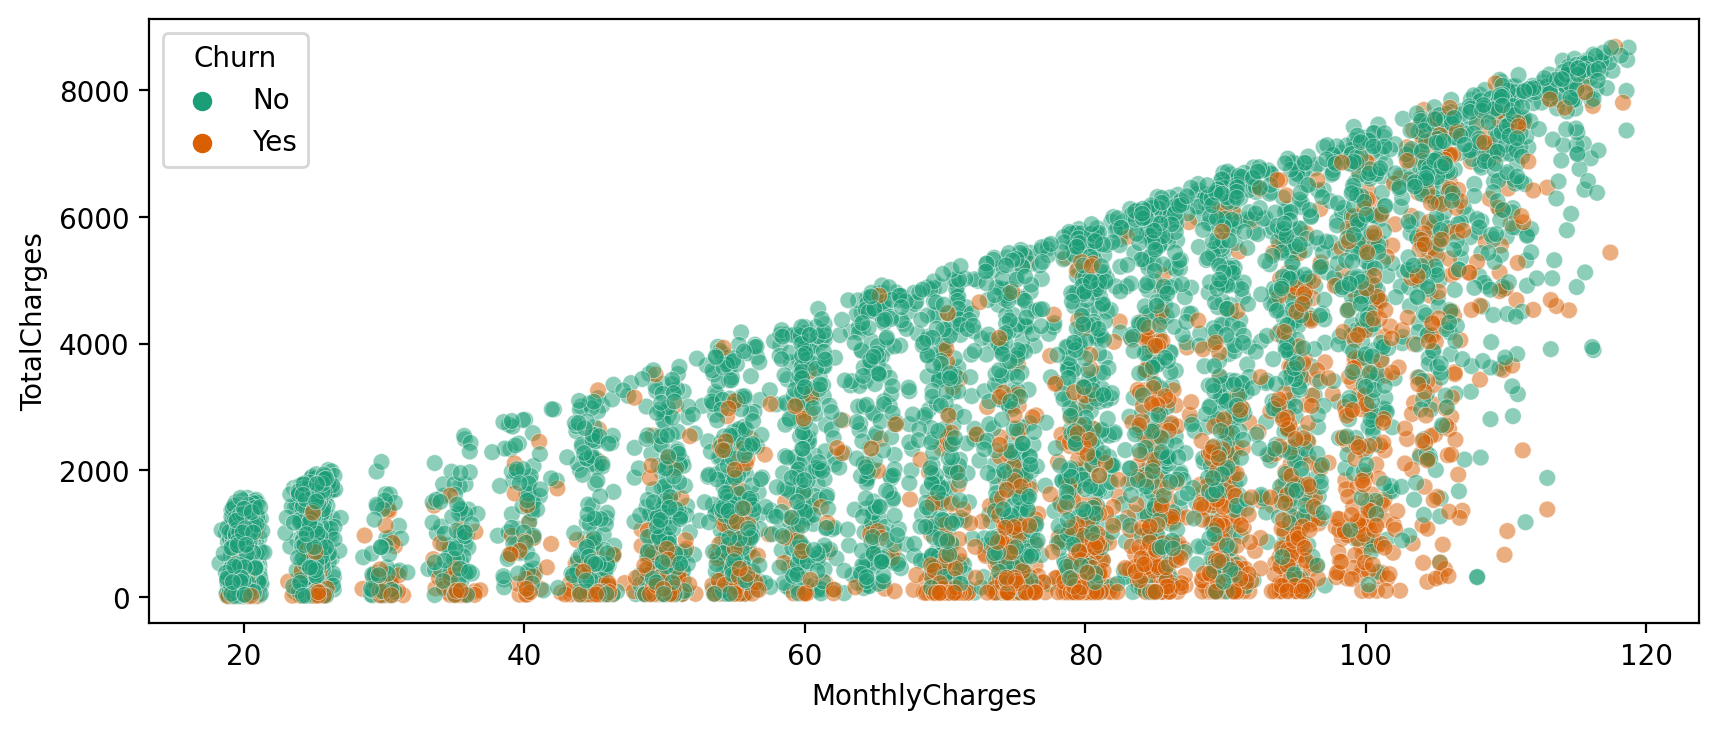

In [19]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5,linewidth=0.3,palette='Dark2')

lot of people churn when their monthly charges higher. 

<AxesSubplot:xlabel='tenure'>

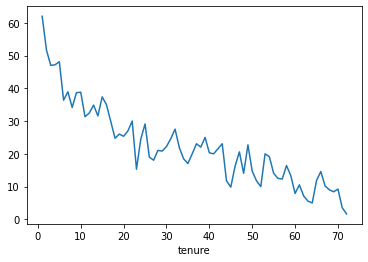

In [20]:
No_churn = df.groupby(['Churn','tenure']).count().T['No']
yes_churn = df.groupby(['Churn','tenure']).count().T['Yes']
churn_rate = 100*yes_churn/(No_churn+yes_churn)
churn_rate.T['customerID'].plot()

In [21]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure <25:
        return '12-24 Months'
    elif tenure <49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [22]:
df['Tenure cohort']= df['tenure'].apply(cohort)

In [23]:
df['Tenure cohort'].value_counts()

Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: Tenure cohort, dtype: int64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

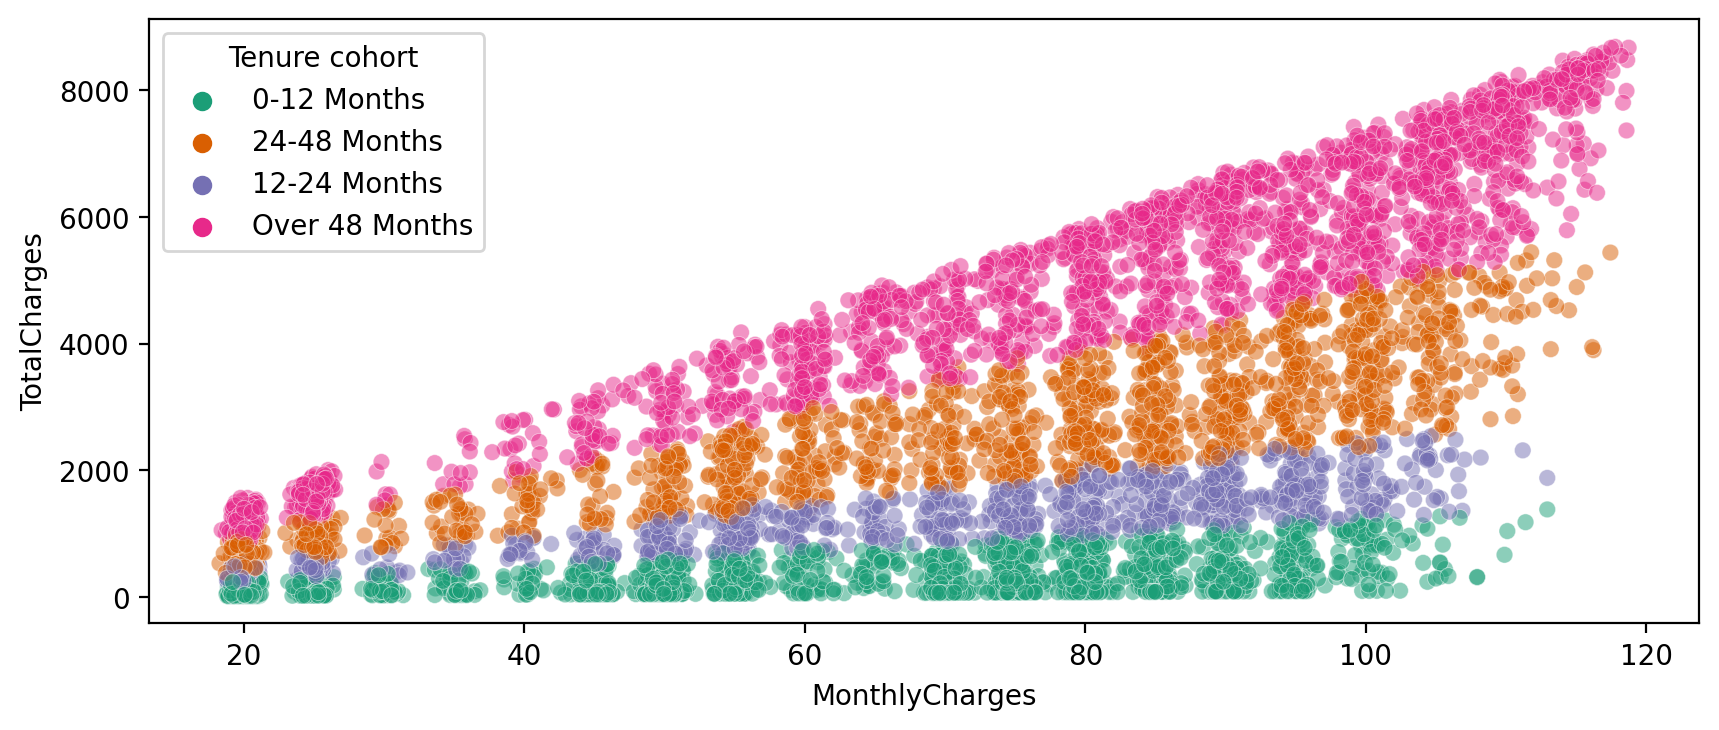

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges',y='TotalCharges',hue='Tenure cohort',alpha=0.5,linewidth=0.3,palette='Dark2')

<AxesSubplot:xlabel='Tenure cohort', ylabel='count'>

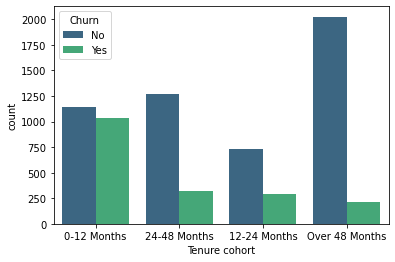

In [25]:
sns.countplot(data=df , x ='Tenure cohort',hue= 'Churn', palette='viridis')

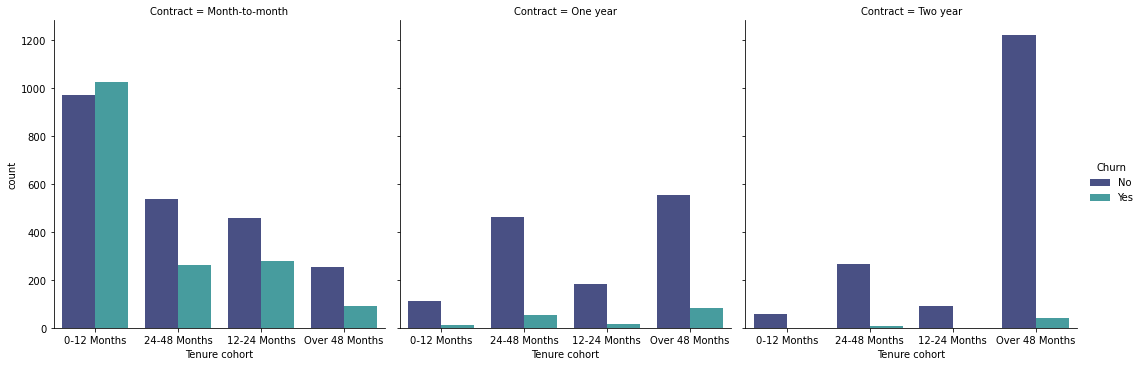

In [26]:
sns.catplot(data=df , x = 'Tenure cohort', hue='Churn', kind ='count', col = 'Contract', palette='mako')

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train , y_train)
from sklearn.metrics import plot_confusion_matrix , confusion_matrix , accuracy_score , classification_report
preds = dt.predict(X_test)
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



In [28]:
confusion_matrix(y_test, preds)

array([[497,  60],
       [ 75,  72]], dtype=int64)

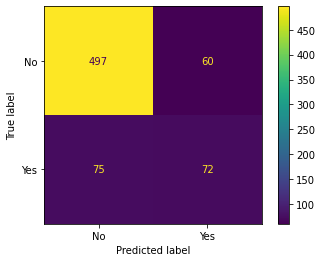

In [29]:
plot_confusion_matrix(dt , X_test , y_test)

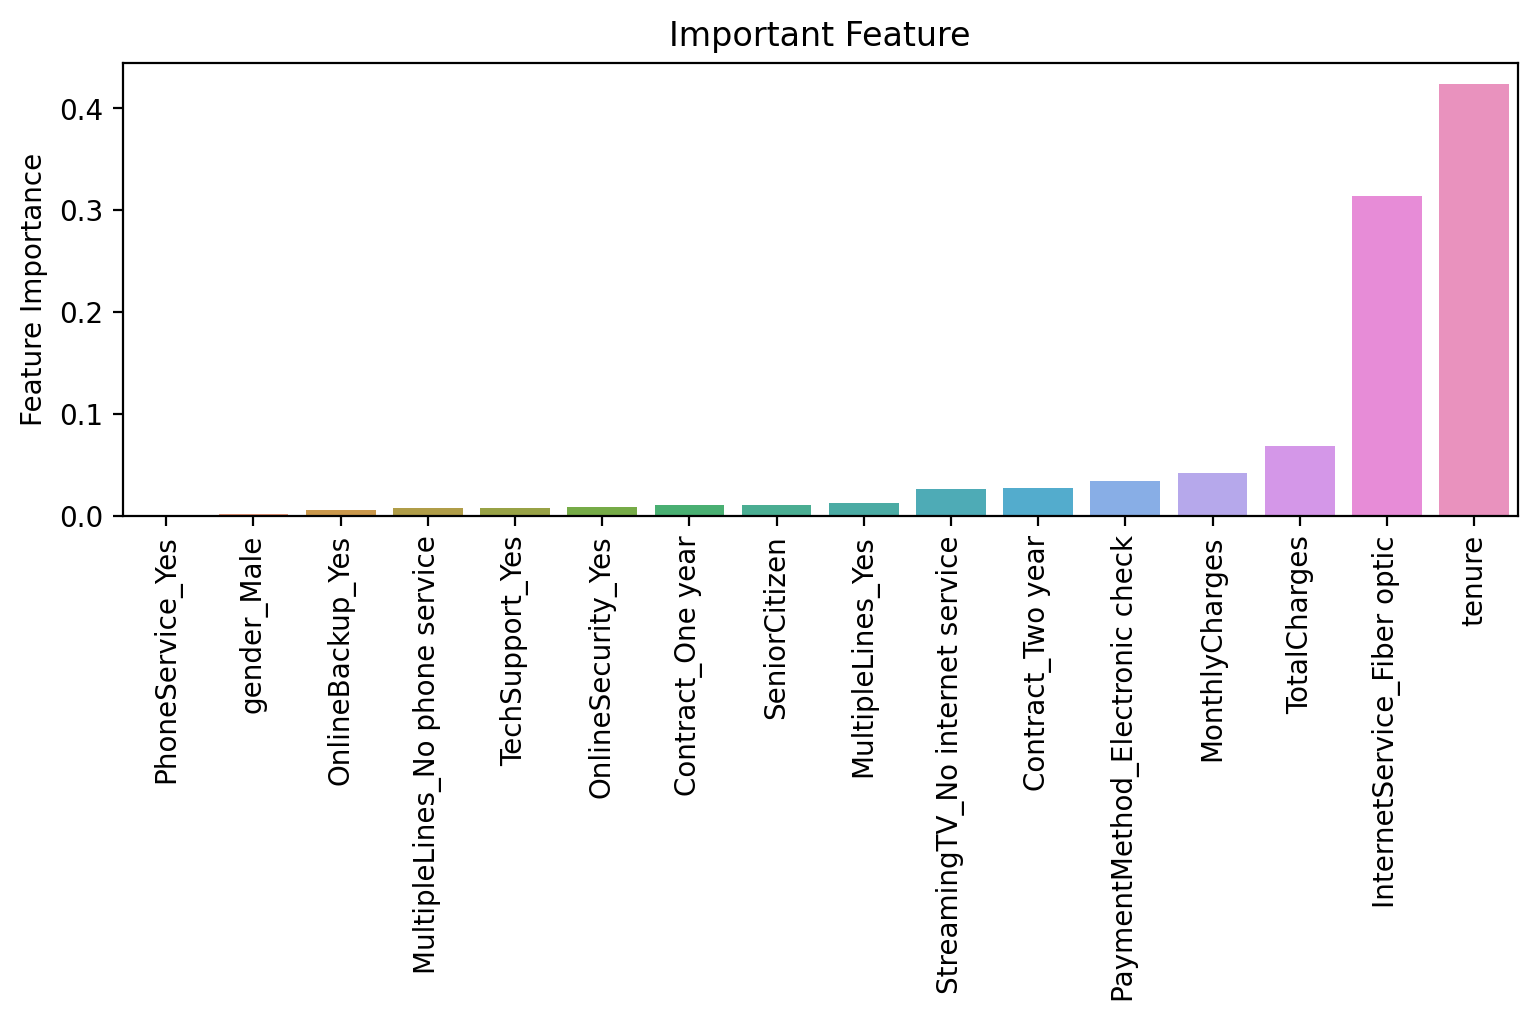

In [30]:
imp_feat = pd.DataFrame(data = dt.feature_importances_ , index = X.columns , columns = ['Feature Importance'])
imp_feat = imp_feat.sort_values('Feature Importance')
imp_feat = imp_feat[imp_feat['Feature Importance'] >0]
plt.figure(figsize=(9,3),dpi=200)
sns.barplot(data = imp_feat , x = imp_feat.index , y = 'Feature Importance')
plt.title('Important Feature')
plt.xticks(rotation=90);

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
preds = rf.predict(X_test)
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.78       704



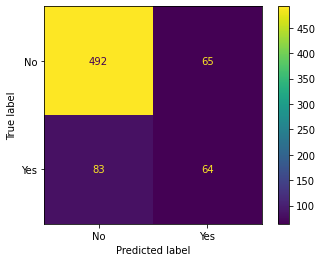

In [33]:
plot_confusion_matrix(rf , X_test , y_test)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100)
gb_model = GradientBoostingClassifier()
ada_model.fit(X_train , y_train)
gb_model.fit(X_train , y_train)
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [35]:
print(classification_report(y_test , ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [36]:
print(classification_report(y_test , gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



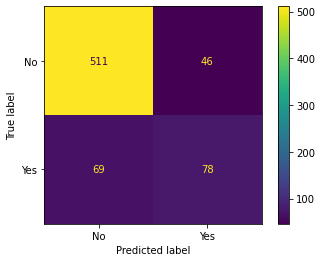

In [37]:
plot_confusion_matrix(ada_model , X_test , y_test)

In [38]:
import pickle
filename = 'model.sav'
pickle.dump(ada_model, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score = load_model.score(X_test, y_test)

In [39]:
model_score

0.8366477272727273

In [40]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test , preds))
    plot_confusion_matrix(model , X_test , y_test)

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.78       704



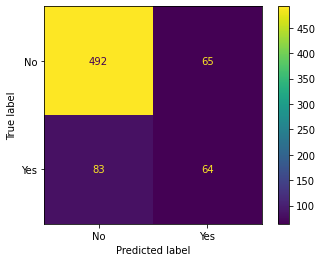

In [41]:
report(rf)